# Topic 16: Practicing AB Testing with Movies

- onl01-dtsc-ft-022221
- 04/02/21

In [1]:
## Importing our study group functions
%load_ext autoreload
%autoreload 2
import sys
py_folder = "../../py_files/"
sys.path.append(py_folder)
import functions_SG as sg

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('seaborn-talk')

# Testing Hypotheses About Movies

In [120]:
df = pd.read_csv('../topic_12_statistical_distributions/joined_movie_data_for_sg.csv')
display(df.head())
df.info()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,revenue-domestic,revenue-worldwide,lost_money,roi-domestic,roi-worldwide,release_month
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",-169536125.0,6.350639e+08,True,-41.289850,154.667286,5
1,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",-307237650.0,-2.002376e+08,True,-87.782186,-57.210757,6
2,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",128405868.0,1.072414e+09,False,38.840250,324.384139,5
3,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",378815482.0,1.748134e+09,False,126.271827,582.711400,4
4,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",-70975705.0,3.559452e+08,True,-23.658568,118.648403,11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3467 entries, 0 to 3466
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3467 non-null   int64  
 1   release_date       3467 non-null   object 
 2   movie              3467 non-null   object 
 3   production_budget  3467 non-null   float64
 4   domestic_gross     3467 non-null   float64
 5   worldwide_gross    3467 non-null   float64
 6   tconst             3467 non-null   object 
 7   primary_title      3467 non-null   object 
 8   original_title     3467 non-null   object 
 9   start_year         3467 non-null   int64  
 10  runtime_minutes    3056 non-null   float64
 11  genres             3467 non-null   object 
 12  revenue-domestic   3467 non-null   float64
 13  revenue-worldwide  3467 non-null   float64
 14  lost_money         3467 non-null   bool   
 15  roi-domestic       3467 non-null   float64
 16  roi-worldwide      3467 

In [121]:
df.isna().sum()

id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
tconst                 0
primary_title          0
original_title         0
start_year             0
runtime_minutes      411
genres                 0
revenue-domestic       0
revenue-worldwide      0
lost_money             0
roi-domestic           0
roi-worldwide          0
release_month          0
dtype: int64

In [122]:
df.dropna(subset=['runtime_minutes'],inplace=True)
df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
tconst               0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres               0
revenue-domestic     0
revenue-worldwide    0
lost_money           0
roi-domestic         0
roi-worldwide        0
release_month        0
dtype: int64

In [123]:
df_ = df.copy()

# Q1: Do movies with longer run times generate more or less revenue than shorter run times?

In [17]:
clean_df = df[df['runtime_minutes'] > 60]


/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(<Figure size 720x576 with 1 Axes>,
 array([<AxesSubplot:title={'center':'Distribution of runtime_minutes'}, xlabel='runtime_minutes', ylabel='Density'>,
        <AxesSubplot:xlabel='runtime_minutes'>], dtype=object))

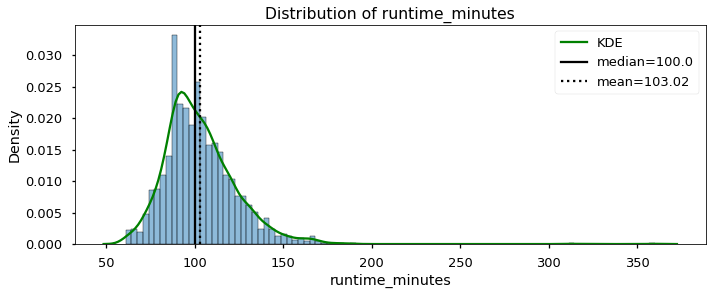

In [19]:
sg.plot_distribution(clean_df['runtime_minutes'],boxplot=False, verbose=False)

In [21]:
clean_df['runtime_minutes'].describe()

count    2788.000000
mean      103.022597
std        20.271087
min        61.000000
25%        90.000000
50%       100.000000
75%       113.000000
max       360.000000
Name: runtime_minutes, dtype: float64

In [22]:
median = clean_df['runtime_minutes'].median()
median

100.0

In [26]:
# df[df['runtime_minutes'] == median]
df = clean_df.copy()
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,revenue-domestic,revenue-worldwide,lost_money,roi-domestic,roi-worldwide,release_month,runtime_groups
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",-169536125.0,6.350639e+08,True,-41.289850,154.667286,5,Short
1,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",-307237650.0,-2.002376e+08,True,-87.782186,-57.210757,6,Short
2,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",128405868.0,1.072414e+09,False,38.840250,324.384139,5,Short
3,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",378815482.0,1.748134e+09,False,126.271827,582.711400,4,Short
4,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",-70975705.0,3.559452e+08,True,-23.658568,118.648403,11,Short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3462,67,2006-04-28,Clean,10000.0,138711.0,1.387110e+05,tt6619196,Clean,Clean,2017,70.0,"Comedy,Drama,Horror",128711.0,1.287110e+05,False,1287.110000,1287.110000,4,Long
3463,68,2001-07-06,Cure,10000.0,94596.0,9.459600e+04,tt1872026,Cure,Cure,2011,93.0,Drama,84596.0,8.459600e+04,False,845.960000,845.960000,7,Long
3464,73,2012-01-13,Newlyweds,9000.0,4584.0,4.584000e+03,tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama",-4416.0,-4.416000e+03,True,-49.066667,-49.066667,1,Long
3465,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller",-7000.0,-7.000000e+03,True,-100.000000,-100.000000,12,Long


In [34]:
## Create my binary group
df['runtime_groups'] = (df['runtime_minutes'] < median).map({True:'Short', 
                                                             False:'Long'})
df['runtime_groups'].value_counts()

Long     1435
Short    1353
Name: runtime_groups, dtype: int64

<AxesSubplot:xlabel='runtime_groups', ylabel='revenue-worldwide'>

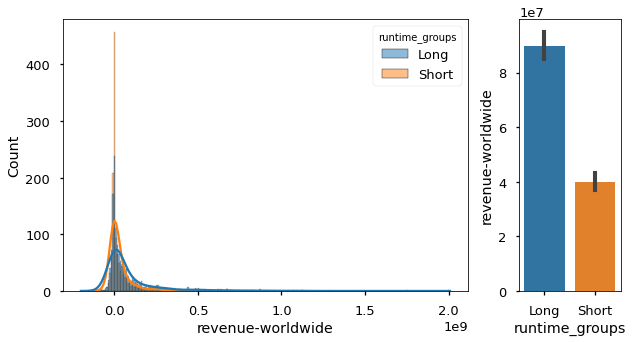

In [35]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5), 
                       gridspec_kw={'width_ratios':[0.8,0.2]})
sns.histplot(data=df, x='revenue-worldwide',hue='runtime_groups',kde=True, ax=ax[0])
sns.barplot(data=df, y='revenue-worldwide',x='runtime_groups',ci=68)

- H0: Long and short movies have the same revenue. 
- H1: Long and short movies have different  revenue. 



- Groups: Long/Short
- Measure: Worldwide Revenue
- Ideal test:

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


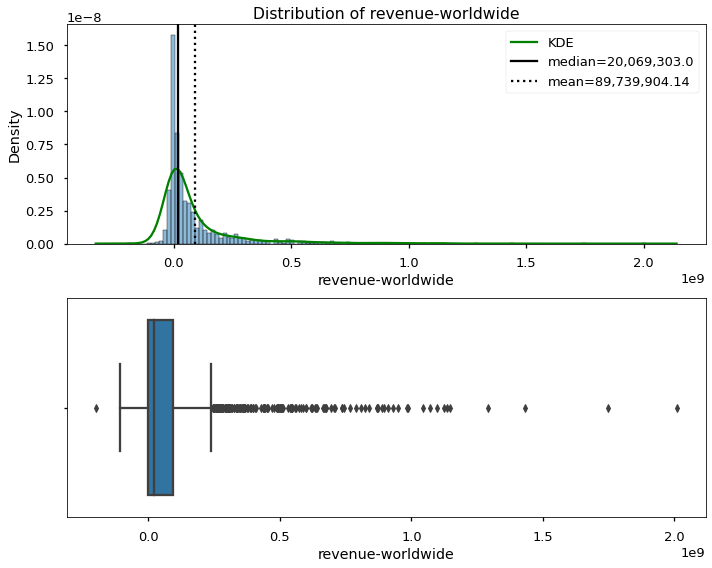

[i] Distribution Stats:
	Skew = 3.82
	Kurtosis = 20.71
	N = 1,435

 NormaltestResult(statistic=1190.9012822563436, pvalue=2.506526567949592e-259)
	- p<.05: The distribution is NOT normally distributed.


In [37]:
long = df.groupby('runtime_groups').get_group('Long')
sg.plot_distribution(long, 'revenue-worldwide');

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


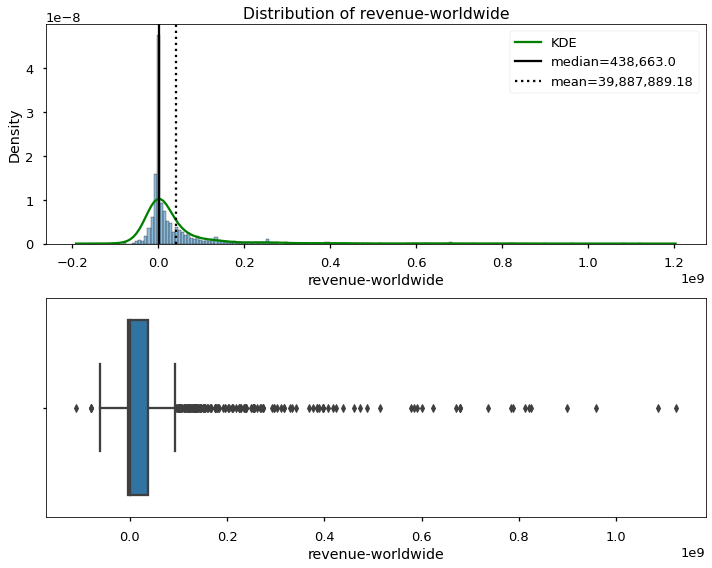

[i] Distribution Stats:
	Skew = 4.8
	Kurtosis = 29.04
	N = 1,353

 NormaltestResult(statistic=1334.9196425792106, pvalue=1.3362346269475206e-290)
	- p<.05: The distribution is NOT normally distributed.


In [38]:
short = df.groupby('runtime_groups').get_group('Short')
sg.plot_distribution(short, 'revenue-worldwide');

In [39]:
stats.levene(long['revenue-worldwide'],short['revenue-worldwide'])

LeveneResult(statistic=67.88087529176774, pvalue=2.6402405246562505e-16)

In [40]:
stats.ttest_ind(long['revenue-worldwide'],short['revenue-worldwide'],equal_var=False)

Ttest_indResult(statistic=8.495626170575216, pvalue=3.40810908881946e-17)

In [41]:
stats.mannwhitneyu(long['revenue-worldwide'],short['revenue-worldwide'])

MannwhitneyuResult(statistic=778633.5, pvalue=7.470485402923227e-20)

In [42]:
sg.Cohen_d(long['revenue-worldwide'], short['revenue-worldwide'])

0.3176134060453906

In [44]:
long['revenue-worldwide'].mean() - short['revenue-worldwide'].mean()

49852014.95747017

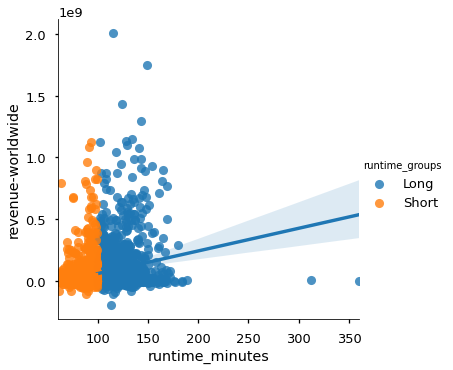

In [57]:
sns.lmplot(data=df, x='runtime_minutes',y='revenue-worldwide', hue='runtime_groups')

In [53]:
df[['revenue-worldwide','runtime_minutes','runtime_groups']].groupby('runtime_groups').corr()

revenue-worldwide  runtime_minutes
runtime_groups                                                      
Long           revenue-worldwide           1.000000         0.169340
               runtime_minutes             0.169340         1.000000
Short          revenue-worldwide           1.000000         0.065163
               runtime_minutes             0.065163         1.000000

# Q2 Are short run time movies more likely to lose money?

- Two categorical features

- H0: Short and long movies have the same likiehood of losing money.
- H1:Short and long movies have different' likiehood of losing money.


- Groups: Long/Short vs Lost/Gained money
- Measure: group membership values
- Ideal test: Chi-Squared



In [59]:
tab = pd.crosstab(df['runtime_groups'],df['lost_money'])
tab

lost_money,False,True
runtime_groups,,
Long,642,793
Short,484,869


In [61]:
chi2,p, dof, expected = stats.chi2_contingency(tab)
p

1.7214359148131321e-06

In [88]:
expected

array([[579.55882353, 855.44117647],
       [546.44117647, 806.55882353]])

In [85]:
tab_perc = pd.crosstab(df['runtime_groups'],df['lost_money'],normalize=True)
tab_perc#.style.background_gradient()

lost_money,False,True
runtime_groups,,
Long,0.230273,0.284433
Short,0.173601,0.311693


In [80]:
results = df.groupby('runtime_groups')['lost_money'].value_counts(normalize=True)
results

runtime_groups  lost_money
Long            True          0.552613
                False         0.447387
Short           True          0.642276
                False         0.357724
Name: lost_money, dtype: float64

In [87]:
odds,p = stats.fisher_exact(tab)
p

1.652824305508238e-06

# Do movies released in some months earn more revenue than others?

- H0: There is no difference between roi depending on release_month.
- H1:There is a difference between roi depending on release_month.


- Groups: Months
- Measure: roi-worldwide
- Ideal test:

In [89]:
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,revenue-domestic,revenue-worldwide,lost_money,roi-domestic,roi-worldwide,release_month,runtime_groups
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",-169536125.0,6.350639e+08,True,-41.289850,154.667286,5,Long
1,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",-307237650.0,-2.002376e+08,True,-87.782186,-57.210757,6,Long
2,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",128405868.0,1.072414e+09,False,38.840250,324.384139,5,Long
3,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",378815482.0,1.748134e+09,False,126.271827,582.711400,4,Long
4,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",-70975705.0,3.559452e+08,True,-23.658568,118.648403,11,Long


In [124]:
df = df_.copy()
new_cols = []
for col in df.columns:
    new_cols.append(col.replace('-',"_"))
df.columns=new_cols
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,revenue_domestic,revenue_worldwide,lost_money,roi_domestic,roi_worldwide,release_month
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",-169536125.0,6.350639e+08,True,-41.289850,154.667286,5
1,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",-307237650.0,-2.002376e+08,True,-87.782186,-57.210757,6
2,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",128405868.0,1.072414e+09,False,38.840250,324.384139,5
3,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",378815482.0,1.748134e+09,False,126.271827,582.711400,4
4,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",-70975705.0,3.559452e+08,True,-23.658568,118.648403,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3462,67,2006-04-28,Clean,10000.0,138711.0,1.387110e+05,tt6619196,Clean,Clean,2017,70.0,"Comedy,Drama,Horror",128711.0,1.287110e+05,False,1287.110000,1287.110000,4
3463,68,2001-07-06,Cure,10000.0,94596.0,9.459600e+04,tt1872026,Cure,Cure,2011,93.0,Drama,84596.0,8.459600e+04,False,845.960000,845.960000,7
3464,73,2012-01-13,Newlyweds,9000.0,4584.0,4.584000e+03,tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama",-4416.0,-4.416000e+03,True,-49.066667,-49.066667,1
3465,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller",-7000.0,-7.000000e+03,True,-100.000000,-100.000000,12


In [125]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [126]:
formula = "roi_worldwide~C(release_month)"
model= ols(formula, df).fit()

<AxesSubplot:xlabel='release_month', ylabel='roi_worldwide'>

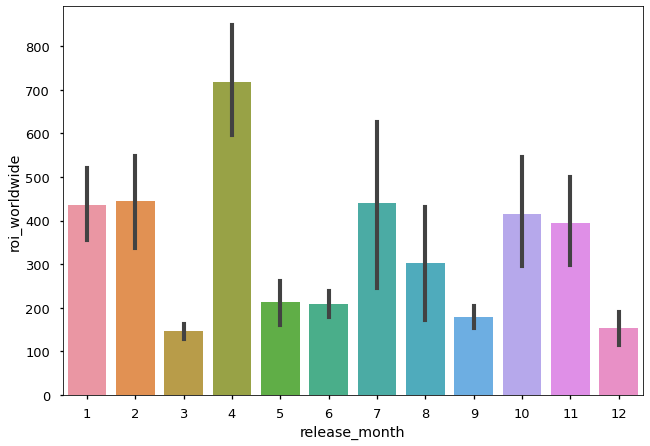

In [128]:
sns.barplot(data=df, x='release_month',y='roi_worldwide',ci=68)

In [129]:
months = df.groupby('release_month').groups

for month in months:
    months[month] = df.groupby('release_month').get_group(month)['roi_worldwide']
months[1]

172     269.713673
279     -50.685762
315     108.323185
435     305.921599
455      98.438521
           ...    
3447    -86.862963
3448    -86.862963
3449    680.172000
3458   -100.000000
3464    -49.066667
Name: roi_worldwide, Length: 198, dtype: float64

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


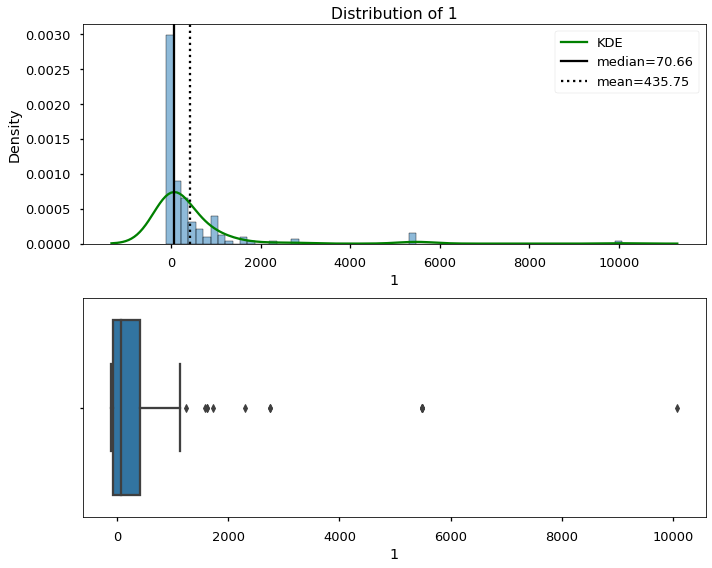

[i] Distribution Stats:
	Skew = 4.92
	Kurtosis = 29.51
	N = 198

 NormaltestResult(statistic=232.03863684720199, pvalue=4.106295644690384e-51)
	- p<.05: The distribution is NOT normally distributed.


/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


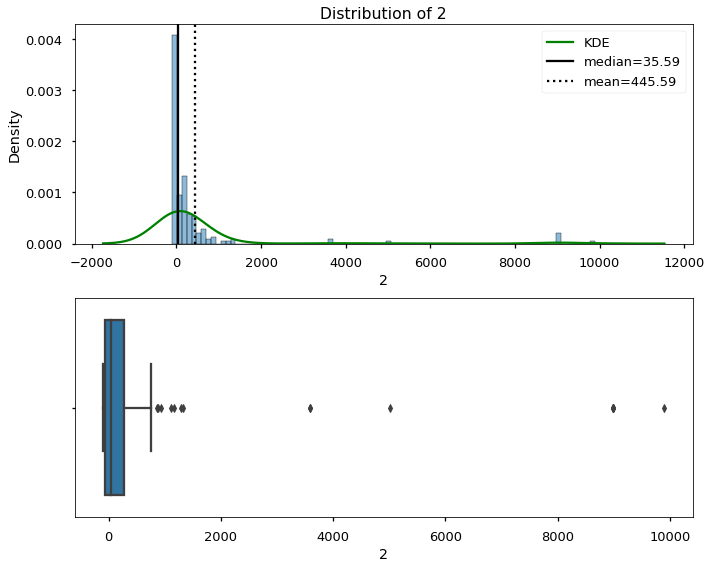

[i] Distribution Stats:
	Skew = 4.92
	Kurtosis = 24.07
	N = 211

 NormaltestResult(statistic=238.85211474630353, pvalue=1.3612010874549431e-52)
	- p<.05: The distribution is NOT normally distributed.


/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


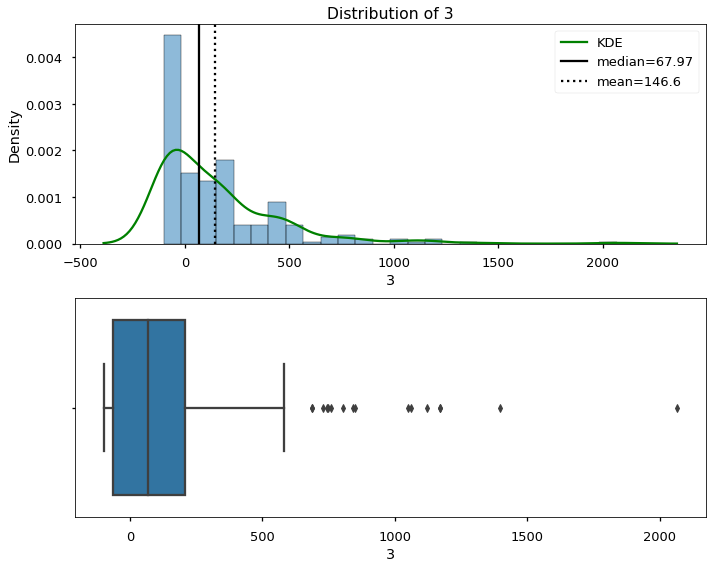

[i] Distribution Stats:
	Skew = 2.33
	Kurtosis = 8.48
	N = 268

 NormaltestResult(statistic=154.44140129743857, pvalue=2.9072060888998466e-34)
	- p<.05: The distribution is NOT normally distributed.


/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


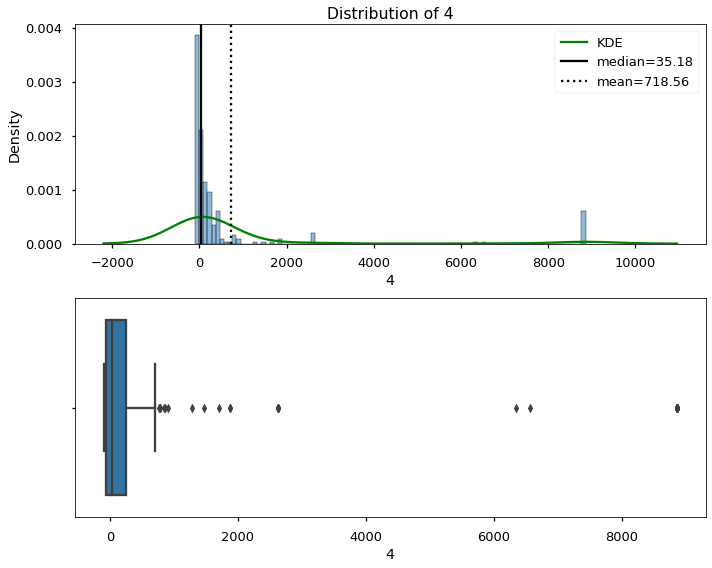

[i] Distribution Stats:
	Skew = 3.35
	Kurtosis = 9.78
	N = 274

 NormaltestResult(statistic=208.19021732532528, pvalue=6.1953909167240265e-46)
	- p<.05: The distribution is NOT normally distributed.


/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


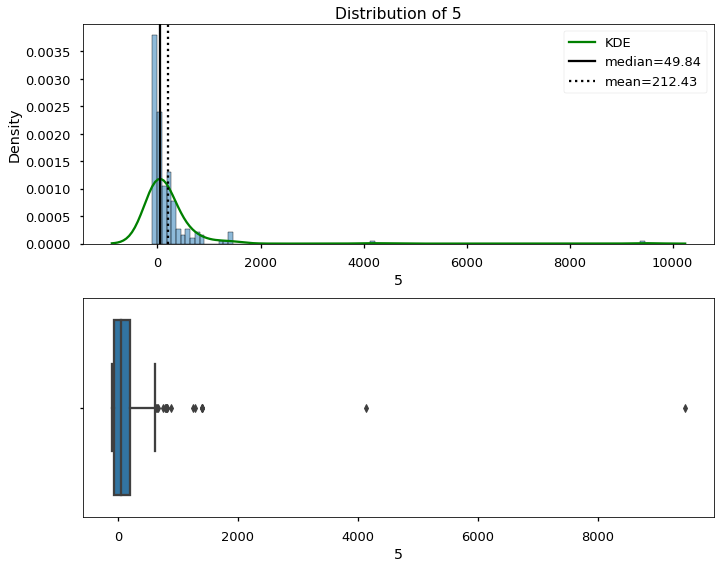

[i] Distribution Stats:
	Skew = 9.41
	Kurtosis = 107.43
	N = 209

 NormaltestResult(statistic=373.6273790130917, pvalue=7.376417734709555e-82)
	- p<.05: The distribution is NOT normally distributed.


/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


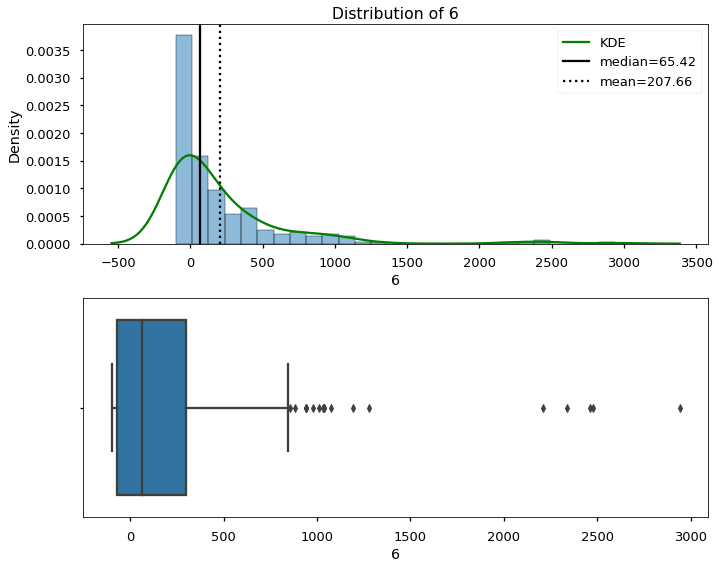

[i] Distribution Stats:
	Skew = 3.15
	Kurtosis = 12.99
	N = 247

 NormaltestResult(statistic=191.5040416282934, pvalue=2.6027096921227615e-42)
	- p<.05: The distribution is NOT normally distributed.


/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


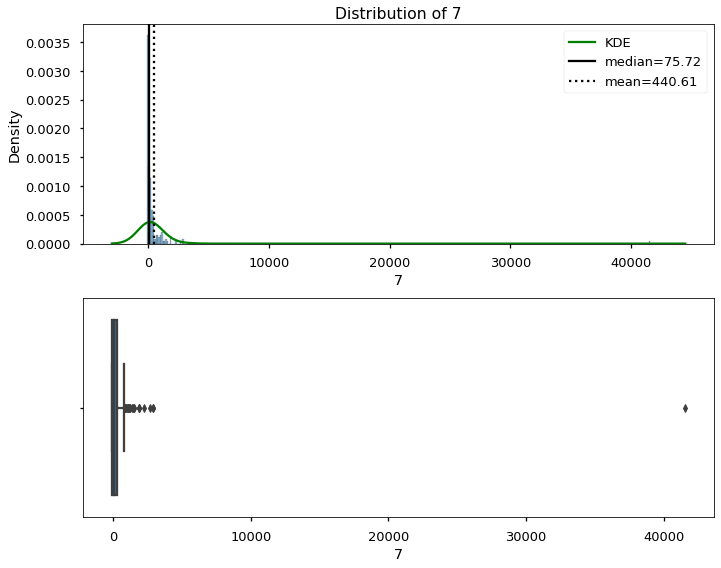

[i] Distribution Stats:
	Skew = 14.01
	Kurtosis = 202.63
	N = 217

 NormaltestResult(statistic=473.4686536427621, pvalue=1.5402392430749834e-103)
	- p<.05: The distribution is NOT normally distributed.


/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


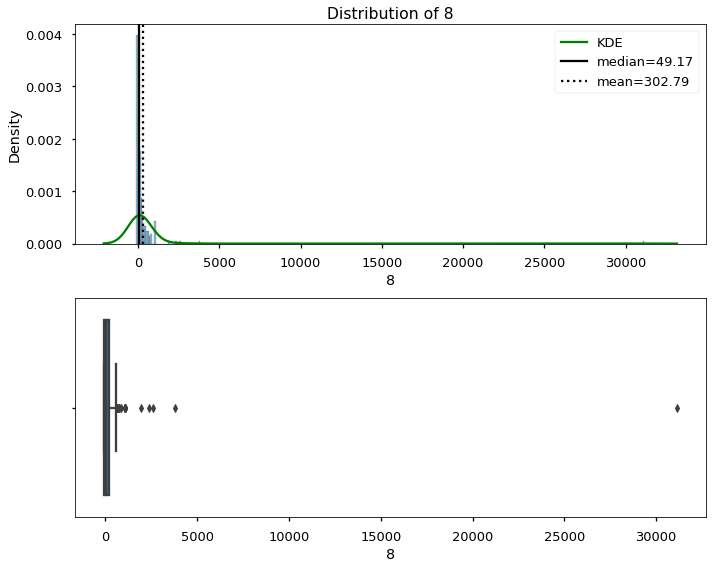

[i] Distribution Stats:
	Skew = 14.63
	Kurtosis = 222.95
	N = 245

 NormaltestResult(statistic=536.2702527718584, pvalue=3.5513559715483454e-117)
	- p<.05: The distribution is NOT normally distributed.


/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


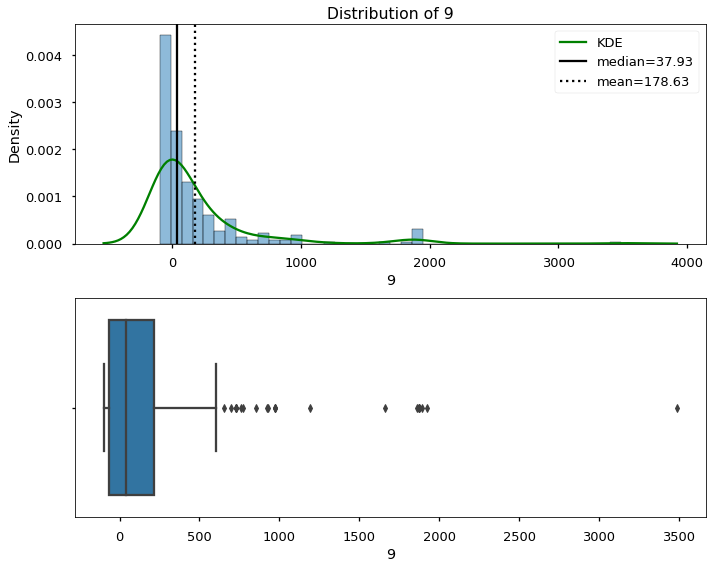

[i] Distribution Stats:
	Skew = 3.52
	Kurtosis = 16.12
	N = 270

 NormaltestResult(statistic=229.95465436872445, pvalue=1.1640757975276543e-50)
	- p<.05: The distribution is NOT normally distributed.


/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


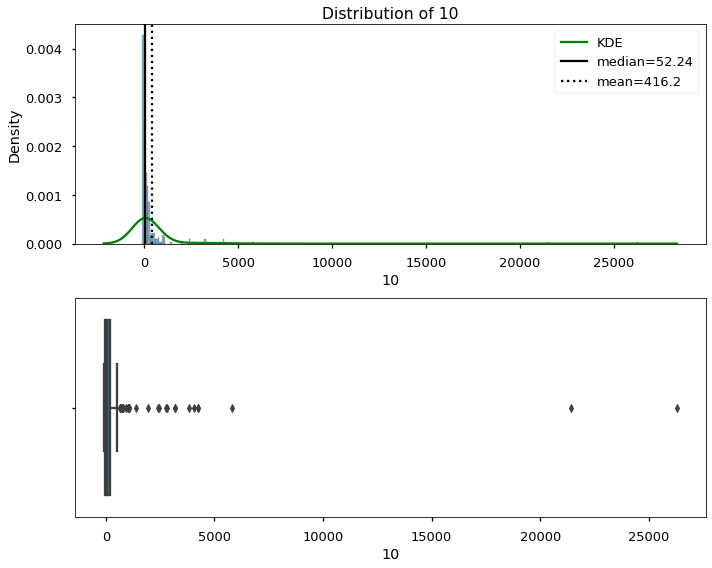

[i] Distribution Stats:
	Skew = 10.1
	Kurtosis = 112.44
	N = 286

 NormaltestResult(statistic=505.5148312402707, pvalue=1.6937493285363254e-110)
	- p<.05: The distribution is NOT normally distributed.


/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


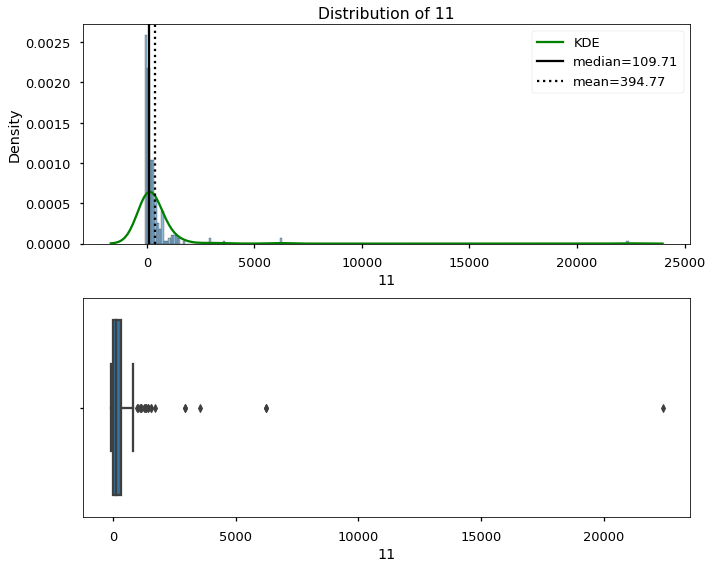

[i] Distribution Stats:
	Skew = 11.55
	Kurtosis = 155.0
	N = 245

 NormaltestResult(statistic=477.48229450195925, pvalue=2.0703184176541767e-104)
	- p<.05: The distribution is NOT normally distributed.


/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


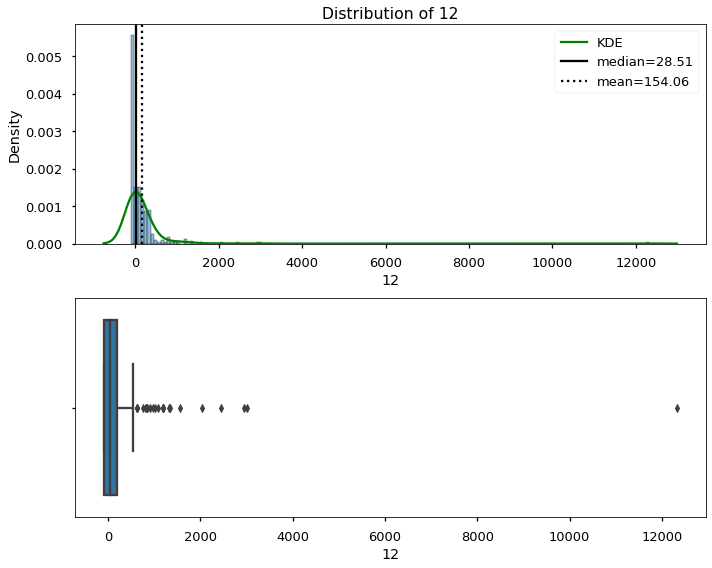

[i] Distribution Stats:
	Skew = 13.0
	Kurtosis = 210.98
	N = 386

 NormaltestResult(statistic=759.5904700219646, pvalue=1.1403159042787167e-165)
	- p<.05: The distribution is NOT normally distributed.


In [130]:
for month, data in months.items():
    data.name = str(month)
    sg.plot_distribution(data)

In [131]:
data_list = [*months.values()]
data_list[0]

172     269.713673
279     -50.685762
315     108.323185
435     305.921599
455      98.438521
           ...    
3447    -86.862963
3448    -86.862963
3449    680.172000
3458   -100.000000
3464    -49.066667
Name: 1, Length: 198, dtype: float64

In [132]:
stats.levene(*data_list)

LeveneResult(statistic=3.2519842465956192, pvalue=0.0001960119837824529)

In [133]:
stats.kruskal(*data_list)

KruskalResult(statistic=44.58863244702112, pvalue=5.730654139098781e-06)

In [136]:
sm.stats.anova_lm(model,robust='hc3')

,df,sum_sq,mean_sq,F,PR(>F)
C(release_month),11.0,8.612399e+07,7.829453e+06,3.332126,0.00014
Residual,3044.0,7.152447e+09,2.349687e+06,NaN,NaN


In [135]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
results = pairwise_tukeyhsd(df['roi_worldwide'],df['release_month'])
results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,9.8373,0.9,-486.2157,505.8903,False
1,3,-289.1556,0.66,-758.9774,180.6663,False
1,4,282.8101,0.6819,-184.8209,750.4412,False
1,5,-223.3229,0.9,-720.5236,273.8778,False
1,6,-228.0959,0.9,-706.3285,250.1367,False
1,7,4.8556,0.9,-487.8663,497.5775,False
1,8,-132.9628,0.9,-612.0631,346.1375,False
1,9,-257.1278,0.7982,-726.2097,211.9541,False
1,10,-19.551,0.9,-483.0485,443.9464,False
1,11,-40.9823,0.9,-520.0826,438.118,False


In [ ]:
# sm.stats.multipletests()

In [109]:
# results._results_table()

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


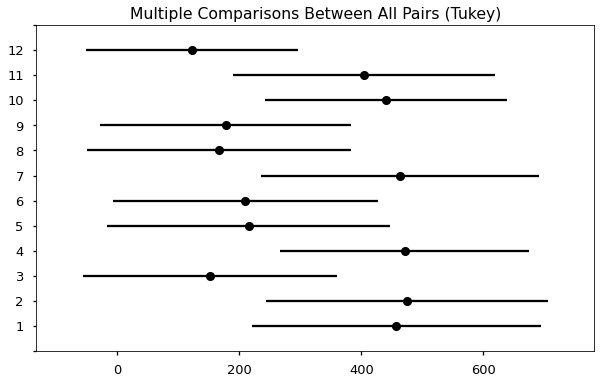

In [105]:
results.plot_simultaneous();